# Development notebook. No experiments or results here. For dev purposes




In [2]:
run init.ipynb

Done.


In [ ]:
dataset_name='circles'
imbalance_ratio=.10
missingness_pattern=1 
imputation_method='without'
use_missing_indicator_variables=None
ratio_of_missing_values=.3
ratio_missing_per_class=None

def check_experiment_already_done(df, **kwargs):
    
    narrowed_df=deepcopy(df)
    print(len(narrowed_df))
    for key, value in kwargs.items():
        
        if key=='ratio_missing_per_class':
            if value is None:
                narrowed_df = narrowed_df[narrowed_df['ratio_missing_per_class_0'].isnull()]
                narrowed_df = narrowed_df[narrowed_df['ratio_missing_per_class_1'].isnull()]
            else:
                narrowed_df = narrowed_df[narrowed_df['ratio_missing_per_class_0']==value[0]]
                narrowed_df = narrowed_df[narrowed_df['ratio_missing_per_class_1']==value[1]]    
                
        elif key in ['use_missing_indicator_variables']:
            narrowed_df = narrowed_df[narrowed_df['use_missing_indicator_variables'].isnull()]
        
        else:
        
            narrowed_df = narrowed_df[narrowed_df[key]==value]
            
        #print(len(narrowed_df), key, value)
        
    return len(narrowed_df) > 0



kwargs, _bool = check_experiment_already_done(df, 
                          dataset_name=dataset_name, 
                          imbalance_ratio=imbalance_ratio, 
                          missingness_pattern=missingness_pattern, 
                          imputation_method=imputation_method,
                          use_missing_indicator_variables=use_missing_indicator_variables,
                          ratio_of_missing_values=ratio_of_missing_values, 
                          ratio_missing_per_class=ratio_missing_per_class)


# Experiment on the best imputation technics in the case of single disribution in the bayesian framework 


First: multi-distribution - INDEPENDANT 

Second: Single-distribution - Which imputation method ? 

Third: NAM: Which config is best between encoding or imputation ?

Fourth: NAM: Which config is best between using indicator Variables or not ? 

Fifth: 

In [ ]:
"""  Parameters of the experiment """
approach = 'multi_distributions'


range_dataset_name = ['blobs', 'circles', 'moons']
range_ratio_of_missing_values = [0., 0.1, 0.2, 0.3]
range_ratio_missing_per_class = [[0,0.25], [0.1, 0.3]]
range_imbalance_ratio = [0.1, 0.25, 0.5]
range_missingness_pattern = [1, 3, 4, 5]

missing_data_handling = 'without'
imputation_method = 'without'
range_use_missing_indicator_variables = False

**First set of experiments deciding on which of the `imputation method` is the best**

In [ ]:
"""  Parameters of the experiment """
approach = 'single_distribution'

range_dataset_name = ['blobs', 'circles', 'moons']
range_ratio_of_missing_values = [0., 0.1, 0.2, 0.3]
range_ratio_missing_per_class = [[0,0.25], [0.1, 0.3]]
range_imbalance_ratio = [0.1, 0.25, 0.5]
range_missingness_pattern = [1, 3, 4, 5]

missing_data_handling = 'imputation'
range_imputation_method = ['multi_dimensional_weighting', 'mice', 'knn', 'mean']
range_use_missing_indicator_variables = False

**`NAN` Second set of experiments deciding whether `encoding or imputing`**

In [ ]:
"""  Parameters of the experiment """
approach = 'nam'

range_dataset_name = ['blobs', 'circles', 'moons']
range_ratio_of_missing_values = [0., 0.1, 0.2, 0.3]
range_ratio_missing_per_class = [[0,0.25], [0.1, 0.3]]
range_imbalance_ratio = [0.1, 0.25, 0.5]
range_missingness_pattern = [1, 3, 4, 5]

range_missing_data_handling = ['encoding', TODECIDE] #TODO THIS IS WHERE WE SHOULD DO IMUTING BASED ON THE  OTHER EXPERIMENT
imputation_method = 'without'
range_use_missing_indicator_variables = False




**`NAN` Second set of experiments deciding wheether `using indicator variable is useful`**

In [ ]:
"""  Parameters of the experiment """
approach = 'nam'

range_dataset_name = ['blobs', 'circles', 'moons']
range_ratio_of_missing_values = [0., 0.1, 0.2, 0.3]
range_ratio_missing_per_class = [[0,0.25], [0.1, 0.3]]
range_imbalance_ratio = [0.1, 0.25, 0.5]
range_missingness_pattern = [1, 3, 4, 5]

range_missing_data_handling = ['encoding', TODECIDE] #TODO THIS IS WHERE WE SHOULD DO IMUTING BASED ON THE  OTHER EXPERIMENT
imputation_method = 'without'
range_use_missing_indicator_variables = [True, False]




In [1]:
def check_experiment_already_done(df, **kwargs):
    
    narrowed_df=df
    
    for key, value in kwargs.items():
        
        if key=='ratio_missing_per_class':
            if value is None:
                narrowed_df = narrowed_df[df['ratio_missing_per_class_0']==value]
                narrowed_df = narrowed_df[df['ratio_missing_per_class_1']==value]
            else:
                narrowed_df = narrowed_df[df['ratio_missing_per_class_0']==value[0]]
                narrowed_df = narrowed_df[df['ratio_missing_per_class_1']==value[1]]            
        else:
        
            narrowed_df = narrowed_df[df[key]==value]
        
    return len(narrowed_df) > 0

In [34]:
df = create_df()

In [46]:



"""  Fix parameters """
#Dataset default parameters
num_samples = 1000#NUM_SAMPLES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN

# Verbosity
verbosity=0



save=False

missingness_dictionnary = {1: (range_ratio_of_missing_values, len(range_ratio_of_missing_values)*[None]),
                           2: (range_ratio_of_missing_values, len(range_ratio_of_missing_values)*[None]),
                           3: (range_ratio_of_missing_values, len(range_ratio_of_missing_values)*[None]),
                           4: (len(range_ratio_missing_per_class)*[None], range_ratio_missing_per_class),
                           5: (len(range_ratio_missing_per_class)*[None], range_ratio_missing_per_class)}

for dataset_name in range_dataset_name:
    
    for imbalance_ratio in range_imbalance_ratio:
        
        for missingness_pattern in range_missingness_pattern:
            
            for missingness_pattern, (ratio_of_missing_values_list, ratio_missing_per_class_list) in missingness_dictionnary.items():
                
                for ratio_of_missing_values, ratio_missing_per_class in zip(ratio_of_missing_values_list, ratio_missing_per_class_list):
                    

                    if check_experiment_already_done(df, 
                                                      dataset_name=dataset_name, 
                                                      imbalance_ratio=imbalance_ratio, 
                                                      missingness_pattern=missingness_pattern, 
                                                      ratio_of_missing_values=ratio_of_missing_values, 
                                                      ratio_missing_per_class=ratio_missing_per_class):


                        print("Experiment already done.")
                        continue
                                
                    print("{} - imputation method: {} imbalance: {} pattern: {} ratio_missing:{} ratio_per_class: {}".format(dataset_name, 
                                                                                                                              imputation_method, 
                                                                                                                              imbalance_ratio,
                                                                                                                              missingness_pattern,
                                                                                                                              ratio_of_missing_values, 
                                                                                                                              ratio_missing_per_class))

                    start_time = time()

                    dataset = DatasetGenerator(dataset_name=dataset_name, 
                                            num_samples=num_samples, 
                                            imbalance_ratio=imbalance_ratio, 
                                            missing_data_handling=missing_data_handling,
                                            imputation_method=imputation_method,
                                            verbosity=verbosity)

                    # Creation of the missingness
                    dataset.generate_missing_coordinates(missingness_pattern=missingness_pattern, 
                                                         ratio_of_missing_values=ratio_of_missing_values, 
                                                         ratio_missing_per_class=ratio_missing_per_class)

                    dataset.split_test_train()

                    # Create the experiments
                    exp = Experiments(dataset_name, 
                                      dataset=dataset, 
                                      purpose='classification', 
                                      approach = approach, 
                                      previous_experiment=None, 
                                      save_experiment=save, 
                                      verbosity=verbosity, 
                                      debug=False, 
                                      proportion_train=PROPORTION_TRAIN, 
                                      resolution=RESOLUTION, 
                                      bandwidth=BANDWIDTH,
                                      random_state=RANDOM_STATE)


                    # Estimate the distributions 
                    exp.fit()

                    # Estimate the distributions 
                    exp.predict()

                    # Plot results
                    #exp.plot()


                    end_time = time()

                    hours, rest = divmod(end_time - start_time, 3600)
                    minutes, seconds = divmod(rest, 60)
                    print("Done ({}h {}m and {:.2f}s).\n".format(int(hours), int(minutes), seconds))
                #except:
                #    print("/!\. Error!\n")


circles - imputation method: without imbalance: 0.1 pattern: 1 ratio_missing:0.0 ratio_per_class: None
Done (0h 0m and 8.79s).

circles - imputation method: without imbalance: 0.1 pattern: 1 ratio_missing:0.1 ratio_per_class: None
Done (0h 0m and 9.09s).

circles - imputation method: without imbalance: 0.1 pattern: 1 ratio_missing:0.2 ratio_per_class: None
Done (0h 0m and 8.87s).

circles - imputation method: without imbalance: 0.1 pattern: 1 ratio_missing:0.3 ratio_per_class: None
Done (0h 0m and 8.62s).

circles - imputation method: without imbalance: 0.1 pattern: 2 ratio_missing:0.0 ratio_per_class: None
Done (0h 0m and 8.79s).

circles - imputation method: without imbalance: 0.1 pattern: 2 ratio_missing:0.1 ratio_per_class: None
Done (0h 0m and 8.46s).

circles - imputation method: without imbalance: 0.1 pattern: 2 ratio_missing:0.2 ratio_per_class: None
Done (0h 0m and 8.06s).

circles - imputation method: without imbalance: 0.1 pattern: 2 ratio_missing:0.3 ratio_per_class: None
D

TypeError: iteration over a 0-d array

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc230c56750>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc221b8e690>)

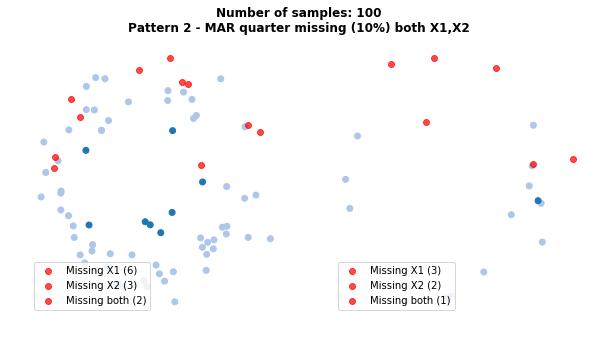

In [45]:
dataset.plot()

In [44]:
exp.dist_pos()

          Attribute Name                	 type                                    	 Value or first element                                                                                                                                
          -----------------------------------------------------------------------------------------------------------------------------------------------------------------

          dataset_name                  	 str                                     	 circles                                                                                                                                               
          dataset                       	 <class 'generateToyDataset.DatasetGenerator'>	 <generateToyDataset.DatasetGenerator object at 0x7fc1f04a9810>                                                                                        
          class_used                    	 int                                     	 1                                

In [2]:
"""  Fix parameters """

#Dataset default parameters
num_samples = 10000#NUM_SAMPLES

# pdf estimation default parameters
resolution = RESOLUTION
bandwidth = BANDWIDTH

# Classification default parameters
proportion_train = PROPORTION_TRAIN

# Verbosity
verbosity=0


"""  Parameters of the experiment """



range_dataset_name = ['circles', 'moons']

range_ratio_of_missing_values = [0., 0.1, 0.2, 0.3]
range_ratio_missing_per_class = [[0,0.25], [0.1, 0.3]]
range_imbalance_ratio = [0.1, 0.25, 0.5]
range_missingness_pattern = [1, 2, 3, 4, 5]
approach = 'multi_distributions'
missing_data_handling = 'without'
imputation_method = 'without'
df = create_df()
print("Approach is multi distributions (bayesian framework) with imputations of the missing values!\n\n\n")
start_total_time = time()
for dataset_name in range_dataset_name:
    for imbalance_ratio in range_imbalance_ratio:
        for missingness_pattern in range_missingness_pattern:

            if missingness_pattern in [1, 2, 3]:
                for ratio_of_missing_values in range_ratio_of_missing_values:
                    if len(df.query( " `dataset_name`==@dataset_name & `approach` == @approach & `imputation_method` == @imputation_method & `missing_data_handling` == @missing_data_handling & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio & `missingness_pattern`==@missingness_pattern")) >= 1 :
                        continue


                    try:
                        #if not len(df.query( " `dataset_name`==@dataset_name & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio & `missingness_pattern`==@missingness_pattern")) >= 1 :

                        print("{} - imputation method: {} imbalance: {} pattern: {} ratio :{}".format(dataset_name, 
                                                                                                      imputation_method, 
                                                                                                      imbalance_ratio,
                                                                                                      missingness_pattern,
                                                                                                      ratio_of_missing_values))

                        start_time = time()

                        dataset = DatasetGenerator(dataset_name=dataset_name, 
                                                num_samples=num_samples, 
                                                imbalance_ratio=imbalance_ratio, 
                                                missing_data_handling=missing_data_handling,
                                                imputation_method=imputation_method,
                                                verbosity=verbosity)

                        # Creation of the missingness
                        dataset.generate_missing_coordinates(missingness_pattern=missingness_pattern, ratio_of_missing_values=ratio_of_missing_values, ratio_missing_per_class=None)

                        dataset.split_test_train()

                        # Create the experiments
                        exp = Experiments(dataset_name, 
                                          dataset=dataset, 
                                          purpose='classification', 
                                          approach = approach, 
                                          previous_experiment=None, 
                                          save_experiment=True, 
                                          verbosity=verbosity, 
                                          debug=False, 
                                          proportion_train=PROPORTION_TRAIN, 
                                          resolution=RESOLUTION, 
                                          bandwidth=BANDWIDTH,
                                          random_state=RANDOM_STATE)


                        # Estimate the distributions 
                        exp.fit()

                        # Estimate the distributions 
                        exp.predict()

                        # Plot results
                        #exp.plot()


                        end_time = time()

                        hours, rest = divmod(end_time - start_time, 3600)
                        minutes, seconds = divmod(rest, 60)
                        print("Done ({}h {}m and {:.2f}s).\n".format(int(hours), int(minutes), seconds))
                    except:
                        print("/!\. Error!\n")

            elif missingness_pattern in [4, 5]:
                for ratio_missing_per_class in range_ratio_missing_per_class:
                    if len(df.query( " `dataset_name`==@dataset_name & `approach` == @approach & `imputation_method` == @imputation_method & `missing_data_handling` == @missing_data_handling & `ratio_missing_per_class_0`==@ratio_missing_per_class[0] & `imbalance_ratio`==@imbalance_ratio & `missingness_pattern`==@missingness_pattern")) >= 1 :
                        continue




                    try:
                        #if not len(df.query( " `dataset_name`==@dataset_name & `ratio_of_missing_values`==@ratio_of_missing_values & `imbalance_ratio`==@imbalance_ratio & `missingness_pattern`==@missingness_pattern")) >= 1 :

                        print("{} - imputation method: {} imbalance: {} pattern: {} ratio per class: {}".format(dataset_name, 
                                                                                                                          imputation_method, 
                                                                                                                          imbalance_ratio,
                                                                                                                          missingness_pattern,
                                                                                                                          str(ratio_missing_per_class)))

                        start_time = time()

                        dataset = DatasetGenerator(dataset_name=dataset_name, 
                                                num_samples=num_samples, 
                                                imbalance_ratio=imbalance_ratio, 
                                                missing_data_handling=missing_data_handling,
                                                imputation_method=imputation_method,
                                                verbosity=verbosity)

                        # Creation of the missingness
                        dataset.generate_missing_coordinates(missingness_pattern=missingness_pattern, ratio_of_missing_values=None, ratio_missing_per_class=ratio_missing_per_class)

                        dataset.split_test_train()

                        # Create the experiments
                        exp = Experiments(dataset_name, 
                                          dataset=dataset, 
                                          purpose='classification', 
                                          approach = approach, 
                                          previous_experiment=None, 
                                          save_experiment=True, 
                                          verbosity=verbosity, 
                                          debug=False, 
                                          proportion_train=PROPORTION_TRAIN, 
                                          resolution=RESOLUTION, 
                                          bandwidth=BANDWIDTH,
                                          random_state=RANDOM_STATE)


                        # Estimate the distributions 
                        exp.fit()

                        # Estimate the distributions 
                        exp.predict()

                        # Plot results
                        #exp.plot()


                        end_time = time()

                        hours, rest = divmod(end_time - start_time, 3600)
                        minutes, seconds = divmod(rest, 60)
                        print("Done ({}h {}m and {:.2f}s).\n".format(int(hours), int(minutes), seconds))
                    except:
                        print("/!\. Error!\n")

end_total_time = time()

hours, rest = divmod(end_total_time - start_total_time, 3600)
minutes, seconds = divmod(rest, 60)
print("Done ({}h {}m and {:.2f}s).\n".format(int(hours), int(minutes), seconds))


Approach is multi distributions (bayesian framework) with imputations of the missing values!



circles - imputation method: without imbalance: 0.1 pattern: 1 ratio :0.0
Doing experiment 77!
Done (0h 4m and 16.54s).

circles - imputation method: without imbalance: 0.1 pattern: 1 ratio :0.1
Doing experiment 79!
Done (0h 3m and 12.38s).

circles - imputation method: without imbalance: 0.1 pattern: 1 ratio :0.2
Doing experiment 81!
Done (0h 3m and 19.99s).

circles - imputation method: without imbalance: 0.1 pattern: 1 ratio :0.3
Doing experiment 82!
Done (0h 2m and 20.15s).

circles - imputation method: without imbalance: 0.1 pattern: 2 ratio :0.0
Doing experiment 83!
Done (0h 2m and 27.62s).

circles - imputation method: without imbalance: 0.1 pattern: 2 ratio :0.1
Doing experiment 84!
Done (0h 2m and 23.33s).

circles - imputation method: without imbalance: 0.1 pattern: 2 ratio :0.2
Doing experiment 85!
Done (0h 1m and 56.18s).

circles - imputation method: without imbalance: 0.1 patte